In [448]:
import pandas as pd
import numpy as np


In [449]:
#Read the csv file
file=pd.read_csv(r'listings.csv')

C:\Users\everma\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [450]:
file.sample(2, random_state=42) 

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
76714,34904405,https://www.airbnb.com/rooms/34904405,20190710134553,2019-07-12,SamsonPLAB Academy Bow Cosy Stay 16.1,NaN,NaN,Guests check in is strictly between 5 to 7pm. ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,93,3,90,0,NaN
57412,28211808,https://www.airbnb.com/rooms/28211808,20190710134553,2019-07-11,"Colindale , London , New, fully furnished flat",This beautiful flat is 25 minutes by tube from...,This flat will feel like a lovely suburban ret...,This beautiful flat is 25 minutes by tube from...,none,"There are plenty of supermarkets in the area, ...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.11


In [451]:
file.shape

(83850, 106)

In [452]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83850 entries, 0 to 83849
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 67.8+ MB


In [453]:
#Data cleaning
#Features we want to drop

In [459]:
percent_missing = (file.isnull().sum() * 100 / len(file)).sort_values(ascending=False)

In [460]:
percent_missing[percent_missing>90]

thumbnail_url                   100.000000
neighbourhood_group_cleansed    100.000000
xl_picture_url                  100.000000
host_acceptance_rate            100.000000
medium_url                      100.000000
jurisdiction_names               99.997615
license                          99.769827
square_feet                      99.469290
monthly_price                    93.645796
weekly_price                     91.073345
dtype: float64

In [461]:
# Checking the column license
file['license'][file['license'].notna()][:5]

31092        SW8-PF-Vauxhall
31093      SW3-SW-Embankment
31094     TW9-AF-Windsorroad
31095       SW18-SA-Buckhold
31096    SW13-GT-lillianroad
Name: license, dtype: object

In [462]:
# Checking the column jurisdiction_names 
file['jurisdiction_names'][file['jurisdiction_names'].notna()][:5]

62899    {"translation missing: en.occupancy.taxes.juri...
68150    {"translation missing: en.occupancy.taxes.juri...
Name: jurisdiction_names, dtype: object

In [463]:
# Checking the column square_feet
file['square_feet'][file['square_feet'].notna()][:5]

0      538.0
3     1001.0
4      700.0
18     237.0
19     129.0
Name: square_feet, dtype: float64

In [464]:
#Remove features with percentage of missing values greater than 90%
cols1=percent_missing[percent_missing>90].index
cols1

Index(['thumbnail_url', 'neighbourhood_group_cleansed', 'xl_picture_url',
       'host_acceptance_rate', 'medium_url', 'jurisdiction_names', 'license',
       'square_feet', 'monthly_price', 'weekly_price'],
      dtype='object')

In [465]:
#Remove features using domain knowledge 
# experiences_offered (large missing values too)
cols2=['id','listing_url','scrape_id','name','thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url','host_name','host_thumbnail_url','host_picture_url','license','calendar_last_scraped','calendar_updated','experiences_offered']
cols2

['id',
 'listing_url',
 'scrape_id',
 'name',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_thumbnail_url',
 'host_picture_url',
 'license',
 'calendar_last_scraped',
 'calendar_updated',
 'experiences_offered']

In [466]:
count=file.nunique()

In [467]:
#Remove features with zero unique values i.e. empty column
cols3 = [col for col in file.columns if count[col] == 0]
cols3

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'neighbourhood_group_cleansed']

In [468]:
##Remove features with one unique value i.e. same information for every datapoint
cols4 = [col for col in file.columns if count[col] == 1]
cols4

['scrape_id',
 'has_availability',
 'jurisdiction_names',
 'is_business_travel_ready']

In [469]:
# Taking union of cols1,cols2 and cols3
drop_columns=list(set(cols1) | set(cols2) | set(cols3) | set(cols4)) 

In [470]:
drop_columns

['weekly_price',
 'calendar_updated',
 'jurisdiction_names',
 'monthly_price',
 'medium_url',
 'id',
 'host_name',
 'host_picture_url',
 'thumbnail_url',
 'name',
 'xl_picture_url',
 'host_thumbnail_url',
 'calendar_last_scraped',
 'host_acceptance_rate',
 'square_feet',
 'scrape_id',
 'license',
 'experiences_offered',
 'has_availability',
 'is_business_travel_ready',
 'picture_url',
 'host_id',
 'host_url',
 'listing_url',
 'neighbourhood_group_cleansed']

In [471]:
len(drop_columns)

25

In [472]:
file=file.drop(drop_columns, axis=1)
file.shape

(83850, 81)

In [473]:
df=file.copy()

In [474]:
#Feature transformation
#Convert Boolean features to numerical
bool_cols = [col for col in df.columns if count[col] == 2]
bool_cols

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'requires_license',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [475]:
def bool_to_num(b):    
    num=1 if b=='t' else 0
    return num

In [476]:
for col in bool_cols:
    df[col] = df[col].apply(bool_to_num)

In [477]:
#Convert the money(string) values to numbers for all currency columns
def money_to_float(money_str):
    return float(str(money_str).replace(',','').split('$')[-1])

In [478]:
#Checking the target
df['price'][:5]

0     $65.00
1    $100.00
2    $300.00
3    $175.00
4     $65.00
Name: price, dtype: object

In [479]:
df['price']=df['price'].apply(money_to_float)

In [480]:
df['extra_people']=df['extra_people'].apply(money_to_float)

In [481]:
df['security_deposit']=df['security_deposit'].apply(money_to_float)

In [482]:
df['cleaning_fee'] = df['cleaning_fee'].apply(money_to_float)

In [483]:
df['country_code'].value_counts()

GB    83847
FR        2
ES        1
Name: country_code, dtype: int64

In [484]:
#There are two listings from France and one from Spain ; rest all are from Englad
#Remove the rows with country other than England
df=df.drop(df[df['country_code']!='GB'].index)

In [485]:
location_cols=['host_location','host_neighbourhood','street','neighbourhood','neighbourhood_cleansed','city','state','zipcode','market','smart_location','country_code','country']

In [486]:
house_rules=df['house_rules']
house_rules[0]

"I'm an artist and have my artwork up on the wall so please care.  When existing: You must lock all doors and windows when leaving the apartment and building and respect the other tenants in the building. If any problems arise you must contact me asap via telephone."

In [487]:
free_text_cols=['summary','space','description','neighborhood_overview','notes','transit','access','interaction','house_rules','host_about',]
df=df.drop(free_text_cols,axis=1,errors='ignore')
df=df.drop(location_cols,axis=1,errors='ignore')


In [488]:
df.shape

(83847, 59)

In [489]:
##Feature based on host_since and last scrapped
df['host_duration']=(pd.to_datetime(df['last_scraped'])-pd.to_datetime(df['host_since'])).dt.days
df=df.drop(['last_scraped','host_since'],axis=1)


In [490]:
#Checking the feature host_response_time
df['host_response_time'].value_counts()
#host_response_time seems to be an ordinal variable

within an hour        36291
within a few hours    12441
within a day           8530
a few days or more     1805
Name: host_response_time, dtype: int64

In [491]:
host_response_time_dict = {'within an hour': 1, 'within a few hours': 2, 'within a day': 3,'a few days or more': 4}
df['host_response_time']=df['host_response_time'].replace(host_response_time_dict)
df['host_response_time'][:5]

0    2.0
1    3.0
2    1.0
3    3.0
4    2.0
Name: host_response_time, dtype: float64

In [492]:
##Feature based on host_verification_level : sum of all the methods
# df['host_verifications'].isna.sum()
df['host_verification_count']=df['host_verifications'].apply(lambda s: len(s.split(',')))
df['host_verification_count'][:5]
df=df.drop('host_verifications',axis=1)

In [493]:
##Feature based on host_response_rate
df['host_response_rate'].unique()
df['host_response_rate'].isna().sum()

24780

In [494]:
# Fill NA as 0s and convert percentage to decimal values
df['host_response_rate']=df['host_response_rate'].fillna(0)
df['host_response_rate']=(df['host_response_rate'].str.split('%').str[0]).astype(float)*0.01
df['host_response_rate']=df['host_response_rate'].fillna(0)
df['host_response_rate'][:5]
df=df.drop('host_response_rate',axis=1)

In [495]:
##Feature based on room_type
df['room_type'].value_counts()

Entire home/apt    47141
Private room       35970
Shared room          736
Name: room_type, dtype: int64

In [496]:
room_type_dict = {'Shared room': 1, 'Private room': 2, 'Entire home/apt': 3}
df['room_type']=df['room_type'].replace(room_type_dict)
df['room_type'][:5]
df=df.drop('room_type',axis=1)

In [497]:
##Feature based on amenities
df['amenities_count'] = df['amenities'].apply(lambda s: len(s.split(',')))
df['amenities_count'][:5]
amenities=df['amenities']
df=df.drop('amenities',axis=1)

In [498]:
#Features derived from house rules
df['rule_smoking']=house_rules.str.contains('smoking|smoke',case=False, regex=False)
df['rule_smoking']=df['rule_smoking']*1
# df['rule_pets']=house_rules.str.contains('pets',case=False, regex=False)

In [499]:
##property_type
df['property_type'].value_counts()
df=df.drop('property_type',axis=1)
# df['property_type'].isna().sum()
#Lot of categories ,displaying top 5

In [500]:
df['bed_type'].value_counts()


Real Bed         83112
Pull-out Sofa      428
Futon              188
Couch               72
Airbed              47
Name: bed_type, dtype: int64

In [501]:
#One hot encode the bed_type column
one_hot=pd.get_dummies(df['bed_type'],prefix="Is")
df=df.drop('bed_type',axis=1)
df=df.join(one_hot)

In [502]:
# cancellation_policy
df['cancellation_policy'].value_counts()

strict_14_with_grace_period    35878
flexible                       27123
moderate                       19957
super_strict_60                  469
super_strict_30                  391
luxury_moderate                   17
strict                             9
luxury_super_strict_95             3
Name: cancellation_policy, dtype: int64

In [503]:
#One hot encode the bed_type column
one_hot=pd.get_dummies(df['cancellation_policy'])
df=df.drop('cancellation_policy',axis=1)
df=df.join(one_hot)

In [504]:
##Feature based on Latitude and Longitude
center_lat=51.50
center_long=-0.12
df['distance to center']=np.sqrt((center_lat-df['latitude'])**2+(center_long-df['longitude'])**2)
df=df.drop(['latitude','longitude'],axis=1)

In [505]:
#Removing first_review and last_review from the df
cols=['first_review','last_review']
df=df.drop(cols,axis=1)


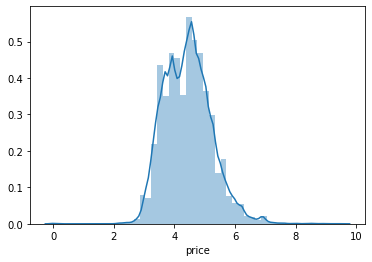

In [506]:
import seaborn as sns
import matplotlib.pyplot as plt
##Plotting log transformed target variable(price)
sns.distplot(np.log1p(df['price']))

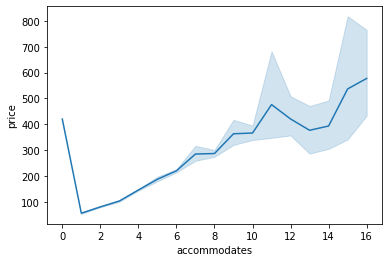

In [507]:
sns.lineplot(x="accommodates", y="price", data=df)

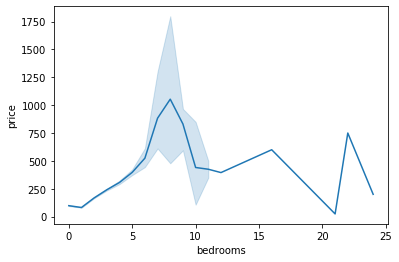

In [508]:
sns.lineplot(x="bedrooms", y="price", data=df)

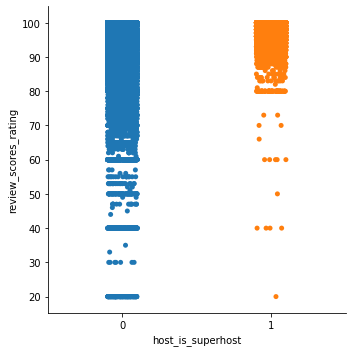

In [509]:
sns.catplot(x="host_is_superhost", y="review_scores_rating", data=df)

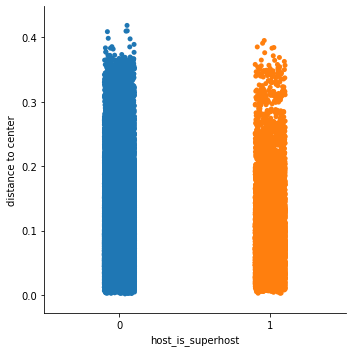

In [510]:
sns.catplot(x="host_is_superhost", y="distance to center", data=df)

C:\Users\everma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


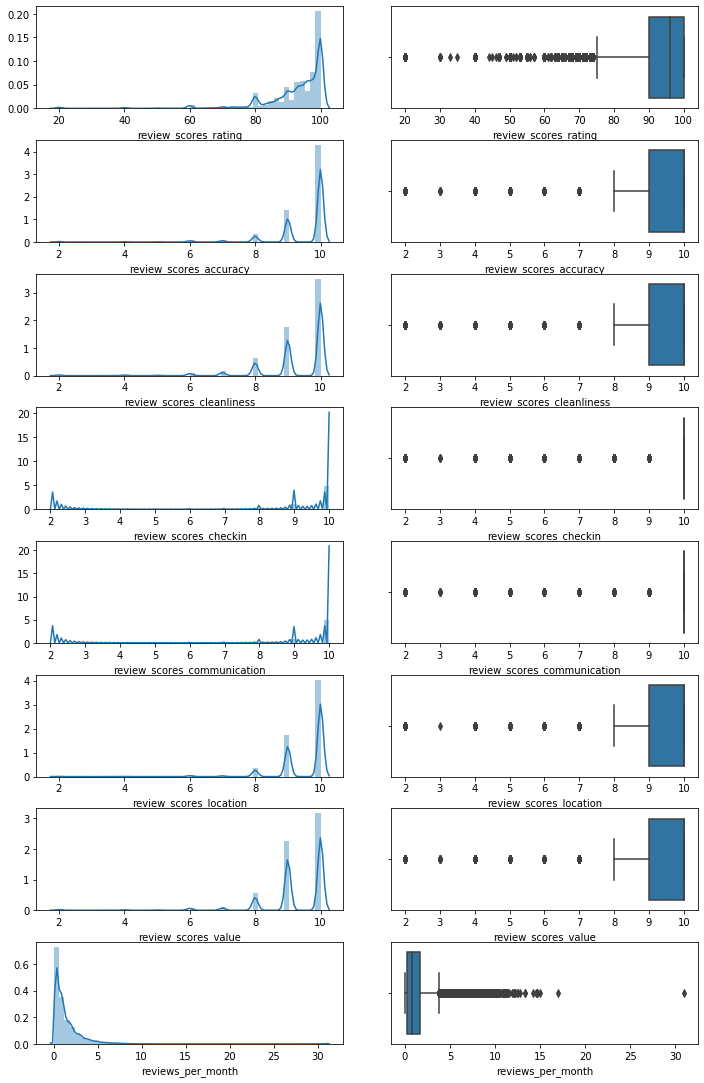

In [511]:
cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10,15))
fig.tight_layout()
total = len(cols)
for i in range(total):
#     col_notnull = train[pd.isnull(train[cols[i]]) == False][cols[i]]
    sns.distplot(df[cols[i]].dropna(), ax=axes[i,0])
    sns.boxplot(df[cols[i]].dropna(), ax=axes[i,1])
fig.show()

C:\Users\everma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


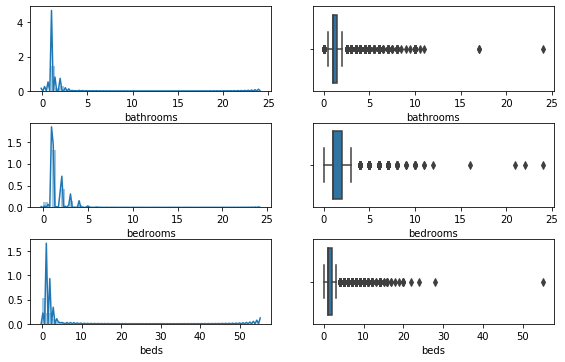

In [512]:
##Imputation
# df['beds'].isna().sum()
cols = ['bathrooms', 'bedrooms', 'beds']
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(8,5))
fig.tight_layout()
for i in range(len(cols)):
    sns.distplot(df[cols[i]].dropna(), ax=axes[i,0])
    sns.boxplot(df[cols[i]].dropna(), ax=axes[i,1])
fig.show()

In [513]:
df.describe()

,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,...,Is_Real Bed,flexible,luxury_moderate,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,distance to center
count,59067.000000,83847.000000,83800.000000,83800.000000,83847.000000,83847.000000,83847.000000,83847.000000,83709.000000,83813.000000,...,83847.000000,83847.000000,83847.000000,83847.000000,83847.000000,83847.000000,83847.000000,83847.000000,83847.000000,83847.000000
mean,1.591125,0.152337,31.876360,31.876360,0.997042,0.370782,0.620392,3.186363,1.297298,1.414590,...,0.991234,0.323482,0.000203,0.000036,0.238017,0.000107,0.427898,0.004663,0.005594,0.087180
std,0.844917,0.359349,172.812245,172.812245,0.054305,0.483017,0.485292,2.012519,0.617855,0.925968,...,0.093216,0.467808,0.014238,0.005982,0.425872,0.010360,0.494777,0.068129,0.074581,0.056608
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001779
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049859
50%,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074338
75%,2.000000,0.000000,5.000000,5.000000,1.000000,1.000000,1.000000,4.000000,1.500000,2.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.107905
max,4.000000,1.000000,1433.000000,1433.000000,1.000000,1.000000,1.000000,16.000000,24.000000,24.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.418623


In [514]:
percent_missing = (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

In [515]:
percent_missing[percent_missing>25]

rule_smoking                   41.741505
security_deposit               35.150930
host_response_time             29.553830
review_scores_checkin          27.181652
review_scores_location         27.180460
review_scores_value            27.180460
review_scores_accuracy         27.118442
review_scores_communication    27.114864
review_scores_cleanliness      27.105323
review_scores_rating           27.057617
cleaning_fee                   25.725428
reviews_per_month              25.070664
dtype: float64

In [516]:
#rule_smoking has more than 40 % data missing,hence dropping the feature
#Impute other features by their corresponding median values
df=df.drop(["rule_smoking"],axis=1)

In [517]:
cols=percent_missing[percent_missing>25].index[1:]

In [518]:
for col in cols:
    df[col]=df[col].fillna(df[col].median())
    

In [519]:
cols=['beds','bathrooms','bedrooms','host_duration','host_listings_count','host_total_listings_count']
for col in cols:
    df[col]=df[col].fillna(df[col].median())
    

In [520]:
#Model building
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [521]:
#dropping 'price' from dataframe
target=df['price']
df=df.drop('price',axis=1)
features=df


In [522]:
tunedParameters=[{'n_estimators':range(50,100,10)}]
#criterion='mae' takes long time 
reg=GridSearchCV(RandomForestRegressor(n_jobs = -1, criterion='mse'), param_grid = tunedParameters,cv=5)
reg.fit(X, y)
means = reg.cv_results_['mean_test_score']
stds = reg.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, reg.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                                          

0.203 (+/-0.220) for {'n_estimators': 50}
0.191 (+/-0.262) for {'n_estimators': 60}
0.197 (+/-0.225) for {'n_estimators': 70}
0.185 (+/-0.240) for {'n_estimators': 80}
0.200 (+/-0.227) for {'n_estimators': 90}


In [524]:
#Taking single split of 80-20 to form our train and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

reg = RandomForestRegressor(n_jobs = -1, criterion='mse', n_estimators=80)
reg.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

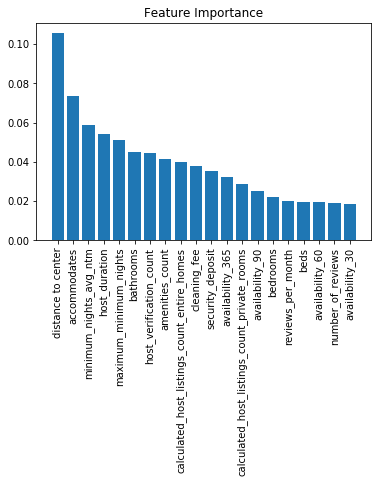

In [533]:
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
x=np.arange(features.shape[1])[:20]
y=importances[indices][:20]
plt.bar(x, y)
plt.xticks(x, names, rotation='vertical')
plt.show()


In [534]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
train_mae=mean_absolute_error(target_train,reg.predict(features_train))
train_mae

20.809467850380905

In [535]:
test_mae=mean_absolute_error(y_test,reg.predict(features_test))
test_mae

109.91039505068574

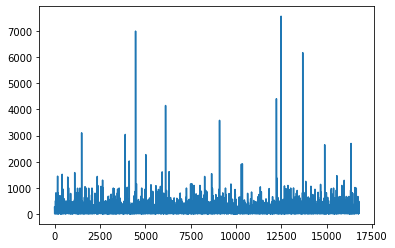

In [539]:
plt.plot(reg.predict(features_test))

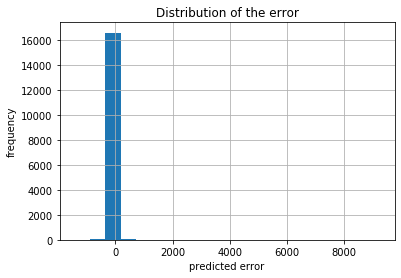

In [542]:
err = target_test-reg.predict(features_test)
plt.figure()
err.hist(bins = 20)
plt.ylabel('frequency')
plt.xlabel('predicted error')
plt.title('Distribution of the error')
plt.show()

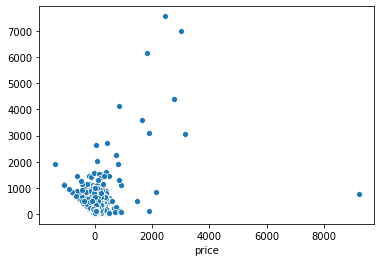

In [545]:
#Scatterplot of error vs prediction
sns.scatterplot(err,reg.predict(features_test))